<a href="https://colab.research.google.com/github/MahmoodInamdar/Machine-learning-/blob/main/Toxic_Comment_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

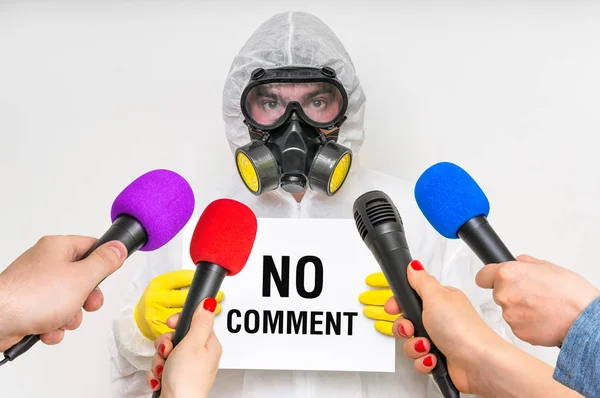

Mahmood Inamdar: GH1023619

This will be my final Assessment which will be submitted on canvas.

The Data which is used by me is Toxic comment classifier with few labels.

Jarif, S.A. (2023) Jigsaw multilingual toxic comment classification, Kaggle. Available at: https://www.kaggle.com/datasets/sadikaljarif/jigsaw-multilingual-toxic-comment-detection/code?select=validation.csv (Accessed: 29 June 2023).


Business problem:- The algorithm which is created can be used in vast social platforms to identify the comments of the people. The model has been created with traditional machine learning algortithm and with deep learning algorithms. The model has learned in such a way that it can now identify all the new comments and flag them as per lables mentioned in the data.

DATA info,

The data consists of english comments from wikipedia page indicating if the comment is toxic or not. The data has multiple features such as toxic, severe toxic, hate, insult, obcense.

The algorithm developed below will determine the toxicity level of the comment and will show that in percentage.

whereas, the deep learning model which is developed will flag the data in several tags such as Insult, hate, severe_toxic, etc.




Below I have imported  the libraries together which will be used in this project.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install contractions

In [ ]:
!pip install nlp_utils

In [ ]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

**1. Loading of DATA**

Below the data has been imported and kept in df variable.

In [ ]:
df=pd.read_csv('jigsaw-toxic-comment-train.csv')


In [ ]:
df.head(2)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0


**2. DATA EXPLORATION**

I have explored the data below and checked the value counts as well as the null values for the preprocessing

In [ ]:
df.info()


In [ ]:
df.isnull().sum()


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
df['toxic'].value_counts()


In [ ]:
df['severe_toxic'].value_counts()


In [ ]:
df['obscene'].value_counts()


In [ ]:
df['threat'].value_counts()


In [ ]:
df['insult'].value_counts()


In [ ]:
df['identity_hate'].value_counts()

**3. DATA PREPROCESSING**

Below I have just took a sample data from the dataset for cross verifying the preprocessing steps which might be needed.

In [ ]:
df['comment_text'][23]

'    the signpost    september      read this signpost in full  single page  unsubscribe      '

Regular expression is used to remove the alpha numeric values, punctuations, ascii values, etc

Also, the same has been crossed varified below by checking the dataframe individually.

In [ ]:
import re
import string

In [ ]:
NUMERIC = lambda x: re.sub('\w*\d\w*', ' ', x)
PUNC_LOWER = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
REMOVE_N = lambda x: re.sub("\n", " ", x)
REMOVENONASCII = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['comment_text'] = df['comment_text'].map(NUMERIC).map(PUNC_LOWER).map(REMOVE_N).map(REMOVENONASCII)


In [ ]:
IC_df=df.loc[:,['id','comment_text','insult']]


In [ ]:
IH__df=df.loc[:,['id','comment_text','identity_hate']]


In [ ]:
OC_df=df.loc[:,['id','comment_text','obscene']]


In [ ]:
THC_df=df.loc[:,['id','comment_text','threat']]


In [ ]:
SC_df=df.loc[:,['id','comment_text','severe_toxic']]


In [ ]:
TC_df=df.loc[:,['id','comment_text','toxic']]


**4. DATA BALANCING**

As per the observation, the data was very unbalance, so I have selected few dataset for each tags to balance out the 0s and 1s, that is toxic or not toxic in the data set for a fair modeling and testing.

In [ ]:
TC_balanced_1 = TC_df[TC_df['toxic'] == 1].iloc[0:5000,:]
TC_df_balanced_0 = TC_df[TC_df['toxic'] == 0].iloc[0:5000,:]
TC_balanced=pd.concat([TC_balanced_1,TC_df_balanced_0])
TC_balanced['toxic'].value_counts()


1    5000
0    5000
Name: toxic, dtype: int64

In [ ]:
SC_df['severe_toxic'].value_counts()
SC_df_1 = SC_df[SC_df['severe_toxic'] == 1].iloc[0:1595,:]
SC_df_0 = SC_df[SC_df['severe_toxic'] == 0].iloc[0:1595,:]
SC_balanced=pd.concat([SC_df_1,SC_df_0])
SC_balanced['severe_toxic'].value_counts()


1    1595
0    1595
Name: severe_toxic, dtype: int64

In [ ]:
OC_df['obscene'].value_counts()
OC_df_1 = OC_df[OC_df['obscene'] == 1].iloc[0:5000,:]
OC_df_0 = OC_df[OC_df['obscene'] == 0].iloc[0:5000,:]
OC_balanced = pd.concat([OC_df_1,OC_df_0])
OC_balanced['obscene'].value_counts()

1    5000
0    5000
Name: obscene, dtype: int64

In [ ]:
THC_df
THC_df['threat'].value_counts()
THC_df_1 = THC_df[THC_df['threat'] == 1].iloc[0:478,:]
THC_df_0 = THC_df[THC_df['threat'] == 0].iloc[0:478,:]
THC_balanced = pd.concat([THC_df_1,THC_df_0])
THC_balanced['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

In [ ]:
IH__df['identity_hate'].value_counts()
IH__df_1 = IH__df[IH__df['identity_hate'] == 1].iloc[0:5000,:]
IH_df_0 = IH__df[IH__df['identity_hate'] == 0].iloc[0:5000,:]
IH_balanced = pd.concat([IH__df_1,IH_df_0])

In [ ]:
IC_df['insult'].value_counts()
IC_df_1 = IC_df[IC_df['insult'] == 1].iloc[0:8000,:]
IC_df_0 = IC_df[IC_df['insult'] == 0].iloc[0:8000,:]
IC_balanced = pd.concat([IC_df_1,IC_df_0])
IC_balanced['insult'].value_counts()

1    8000
0    8000
Name: insult, dtype: int64

**5. MODELING USING TRADITIONAL MODELS**

Below we have imported machine learning libraries for the traditional modeling method.

I have used the following models for modeling:

1. Naive Bayes

NAive bayes is very known in NLP projects as it is independent if the features.

2. SVM

SVM are very popular machine learning algorithms which are used in classification as well as regression models.

3. Random forest

Random forest again is one of the most powerful machine learning algorithm which works multiple decision tree models to make it more powerful and accurate.

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

Below I have defined one function in which all the machine learning modeling is done.


And also I have calculated the F1 score to proceed with the best model.

In [ ]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):


    X = dataframe.comment_text
    y = dataframe[label]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')


    X_train_cv1 = cv1.fit_transform(X_train)
    X_test_cv1  = cv1.transform(X_test)




    BNB = BernoulliNB()
    BNB.fit(X_train_cv1, y_train)


    MNB = MultinomialNB()
    MNB.fit(X_train_cv1, y_train)


    SVM = LinearSVC()
    SVM.fit(X_train_cv1, y_train)


    RF = RandomForestClassifier(n_estimators=100, random_state=50)
    RF.fit(X_train_cv1, y_train)

    f1_score_data = {'F1 Score':[f1_score(BNB.predict(X_test_cv1), y_test), f1_score(MNB.predict(X_test_cv1), y_test),
                                 f1_score(SVM.predict(X_test_cv1), y_test), f1_score(RF.predict(X_test_cv1), y_test)]}

    df_f1 = pd.DataFrame(f1_score_data, index=[ 'BNB', 'MNB', 'SVM', 'RF'])

    return df_f1

**6. EVALUATION OF MODEL**

As it is observed below, we can clearly say that random forest is the best model for our final evaluation.

It can be said that random forest has given the best score out of three and can be used as the final model.

In [ ]:
severe_cv = cv_tf_train_test(SC_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_cv


,F1 Score(severe_toxic)
BNB,0.790738
MNB,0.932377
SVM,0.937901
RF,0.941176


In [ ]:
obscene_cv = cv_tf_train_test(OC_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_cv


,F1 Score(obscene)
BNB,0.766640
MNB,0.887496
SVM,0.915613
RF,0.884261


In [ ]:
threat_cv = cv_tf_train_test(THC_balanced, 'threat', TfidfVectorizer, (1,1))
threat_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_cv


,F1 Score(threat)
BNB,0.745205
MNB,0.902098
SVM,0.894737
RF,0.923077


In [ ]:
insult_cv = cv_tf_train_test(IC_balanced, 'insult', TfidfVectorizer, (1,1))
insult_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_cv


,F1 Score(insult)
BNB,0.786073
MNB,0.894376
SVM,0.906627
RF,0.893128


In [ ]:
identity_cv = cv_tf_train_test(IH_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_cv


,F1 Score(identity_hate)
BNB,0.825420
MNB,0.750237
SVM,0.869565
RF,0.870492


**7. Final Modeling**

Using Random Forest as our model, We will proceed with the final modeling of TOXIC dataset with the TFID Vectorizer for preprocessing the data.


It will convert the data from textual format to numeric format.

In [ ]:
X = TC_balanced.comment_text
y = TC_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
RF = RandomForestClassifier(n_estimators=100, random_state=50)

RF.fit(X_train_fit, y_train)
RF.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

**8. FINAL TESTING**



Below I have tested the model by giving to input

Input 1: I will kill you

The model has predicted that the above statement is 98.8% Toxic.

Input 2: I would love to be a part of you.


The model has predicted that the above statement is 36.4% Toxic.

This model can be used to predict the toxicity percentage of the comment which are used in online platforms.

Through this model companies can analyse the comments and work on them.

In [ ]:
Input1 = ['I will kill you']
Input1_vect = tfv.transform(Input1)
RF.predict_proba(Input1_vect)[:,1]


array([0.98833333])

In [ ]:
Input2 = ['I would love to be a part of you']
Input2_vect = tfv.transform(Input2)
RF.predict_proba(Input2_vect)[:,1]


array([0.36469949])

***DEEP LEARNING MODEL***

**1. IMPORTING LIBRARIES**

Below We have imported libraries for the further processing.

In [ ]:
import tensorflow as tf
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df2 = pd.read_csv('jigsaw-toxic-comment-train.csv')

Taking a sample dataset because of the big data.

In [ ]:
df2 = df2.sample(10000)

**2. DATA PREPROCESSING.**

We will proceed with the preprocessing the data like tokenization which is converting each word to a unique number for the machine to learn.

We will import text Vectorization layer for the preprocessing steps.

This will be used for the tokenisation. This will help map features to the integers sequence.




In [ ]:
from tensorflow.keras.layers import TextVectorization

We have created 2 features-

X = Comment_text

Y = Labels(Converting it to numpy array)

In [ ]:
X = df2['comment_text']
y = df2[df2.columns[2:]].values

MAX_WORDS is set to 200000 inside the vocab.


Basically we have specified this numbers of word in our dictionary.

In [ ]:
MAX_WORDS = 100000

So we have set the max tokens to max words and the maximum lenght per comment to 1500 and we want our output in int format.

In [ ]:
VECTORIZER = TextVectorization(max_tokens=MAX_WORDS, output_sequence_length=1500, output_mode='int')

Just cross checking the use of Text vectorization

In [ ]:
TextVectorization??

In the below code, we have asked VECTORIZER to learn all the vocabolary in the dataset.

With this command the model will learn all the vacabulary in the dataset for further modeling.

In [ ]:
VECTORIZER.adapt(X.values)
VECTORIZER.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'of',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'are',
 'have',
 'your',
 'with',
 'if',
 'article',
 'was',
 'but',
 'or',
 'page',
 'an',
 'my',
 'by',
 'from',
 'at',
 'wikipedia',
 'do',
 'about',
 'me',
 'so',
 'can',
 'what',
 'there',
 'will',
 'all',
 'hate',
 'has',
 'would',
 'no',
 'they',
 'just',
 'please',
 'its',
 'one',
 'like',
 'talk',
 'been',
 'dont',
 'he',
 'we',
 'any',
 'which',
 'should',
 'some',
 'other',
 'here',
 'more',
 'see',
 'who',
 'im',
 'think',
 'because',
 'why',
 'also',
 'his',
 'how',
 'only',
 'know',
 'people',
 'am',
 'articles',
 'up',
 'when',
 'edit',
 'out',
 'orly',
 'use',
 'then',
 'youi',
 'were',
 'may',
 'being',
 'them',
 'time',
 'did',
 'get',
 'their',
 'now',
 'thanks',
 'than',
 'make',
 'even',
 'good',
 'go',
 'does',
 'information',
 'nigger',
 'could',
 'well',
 'very',
 'deletion',
 'such',
 'had',
 'name',
 'want',
 'help',
 'o

In [ ]:
VECTORIZER('Hello, My name is mahmood')[:4]

The below command will tokenize every single word in the comment coloumn.

In [ ]:
VECTORIZER_text = VECTORIZER(X.values)

In [ ]:
VECTORIZER_text

<tf.Tensor: shape=(10000, 1500), dtype=int64, numpy=
array([[18054,   278,     6, ...,     0,     0,     0],
       [   12,     9,   148, ...,     0,     0,     0],
       [  573, 16335, 30591, ...,     0,     0,     0],
       ...,
       [    8,    20,    55, ...,     0,     0,     0],
       [   41,    19,  2572, ...,     0,     0,     0],
       [ 9676,  2036,    97, ...,     0,     0,     0]])>

Below we have created a tensor flow datapipeline. This is very useful for the dataset which cannot fit into the memory from list files with tensor files method. We will pass the DATA to the above VECTORIZER_text and target y.

Cache = This will Cache the data.

shuffle = This will shuffle the data with the buffer size.

batch = This will make a batch (like we have now 16 batches)

prefetch = Helps prevent bottlenecks

In [ ]:

DATA = tf.data.Dataset.from_tensor_slices((VECTORIZER_text, y))
DATA = DATA.cache()
DATA = DATA.shuffle(160000)
DATA = DATA.batch(16)
DATA = DATA.prefetch(8)

In [ ]:
batch_X, batch_y = DATA.as_numpy_iterator().next()

In [ ]:
len(DATA)

625

Below we have created our training, validation and testing data for the modeling and this will be converting to integer.

Training - 70%

Validation - 20%

Testing - 10%

In [ ]:
training = DATA.take(int(len(DATA)*.7))
validation = DATA.skip(int(len(DATA)*.7)).take(int(len(DATA)*.2))
testing = DATA.skip(int(len(DATA)*.9)).take(int(len(DATA)*.1))

**3. MODELING**

We will create a deep learning model such sequential as it is fastest and easiest.

First layer is embedding which will test the word and understand if the word is positive or negative or neutral. 1 embedding per word and with 32 features.

Dropout as regularisation method.

Dense layer to connect the layers.

LSTM is long short-term memory it will have 32 LSTM units with tanh activation function which is better with LSTM and we want to be bidirectional- backward and forward information.


Dense layers are feature extractions fully connected layers.

We have used 6 layers in dense because of the labels and sigmoid to convert output to 0s and 1s.





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding


In [ ]:
model_Deep = Sequential()

model_Deep.add(Embedding(MAX_WORDS+1, 32))

model_Deep.add(Bidirectional(LSTM(32, activation='tanh')))

model_Deep.add(Dense(64, activation='relu'))
model_Deep.add(Dense(128, activation='relu'))
model_Deep.add(Dense(64, activation='relu'))

model_Deep.add(Dense(6, activation='sigmoid'))

In [ ]:
model_Deep.compile(loss='BinaryCrossentropy', optimizer='Adam')


In [ ]:
history = model_Deep.fit(training, epochs=1, validation_data=validation)

437/437 [==============================] - 659s 1s/step - loss: 0.1480 - val_loss: 0.0803


In [ ]:
batch_X, batch_y = testing.as_numpy_iterator().next()


**4. PREDICITION**

We have made the prediction with precision score, recall and Categorical accuracy (batch of data)

In [ ]:
#@title
(model_Deep.predict(batch_X) > 0.5).astype(int)


In [ ]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import CategoricalAccuracy
PRE = Precision()
RE = Recall()
ACC = CategoricalAccuracy()

In the below code, we have unpacked the batches and make a prediction with the above metrics.

After that we have Flatten the prediction for the original shape.

In [ ]:
for batch in testing.as_numpy_iterator():

    X_tr, y_tr = batch

    pred = model_Deep.predict(X_tr)


    y_tr = y_tr.flatten()
    pred = pred.flatten()

    PRE.update_state(y_tr, pred)
    RE.update_state(y_tr, pred)
    ACC.update_state(y_tr, pred)

In [ ]:
print(f'Precision: {PRE.result().numpy()}, Recall:{RE.result().numpy()}, Accuracy:{ACC.result().numpy()}')


Precision: 0.7803030014038086, Recall:0.4327731132507324, Accuracy:0.5483871102333069


**5. BUILDING A GRADIO APP**

Installing gradio (hugging face)

In [ ]:
!pip install gradio jinja2


In [ ]:
import tensorflow as tf
import gradio as gr

Creating a model and save the model

In [ ]:
model_Deep.save('TOXIC')


Now we have loaded our deep learning model in the 'TOXIC' model

In [ ]:
model = tf.keras.models.load_model('TOXIC')


In the below code we have defined a function which will pass the input first through a vectorizer for a sequence of number and it will take to the model and the unpack, flatten and will give the flag.

In [ ]:
#@title
def score_comment(comment):
    vectorized_comment = VECTORIZER([comment])
    results = model_Deep.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

Creating a interface and launching it.


In [ ]:

interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

**6. CONCLUSION**

We have given our input 'I hate you' which is determining that the statement is toxic, insult and obscene.

In [ ]:
interface.launch(share=True)

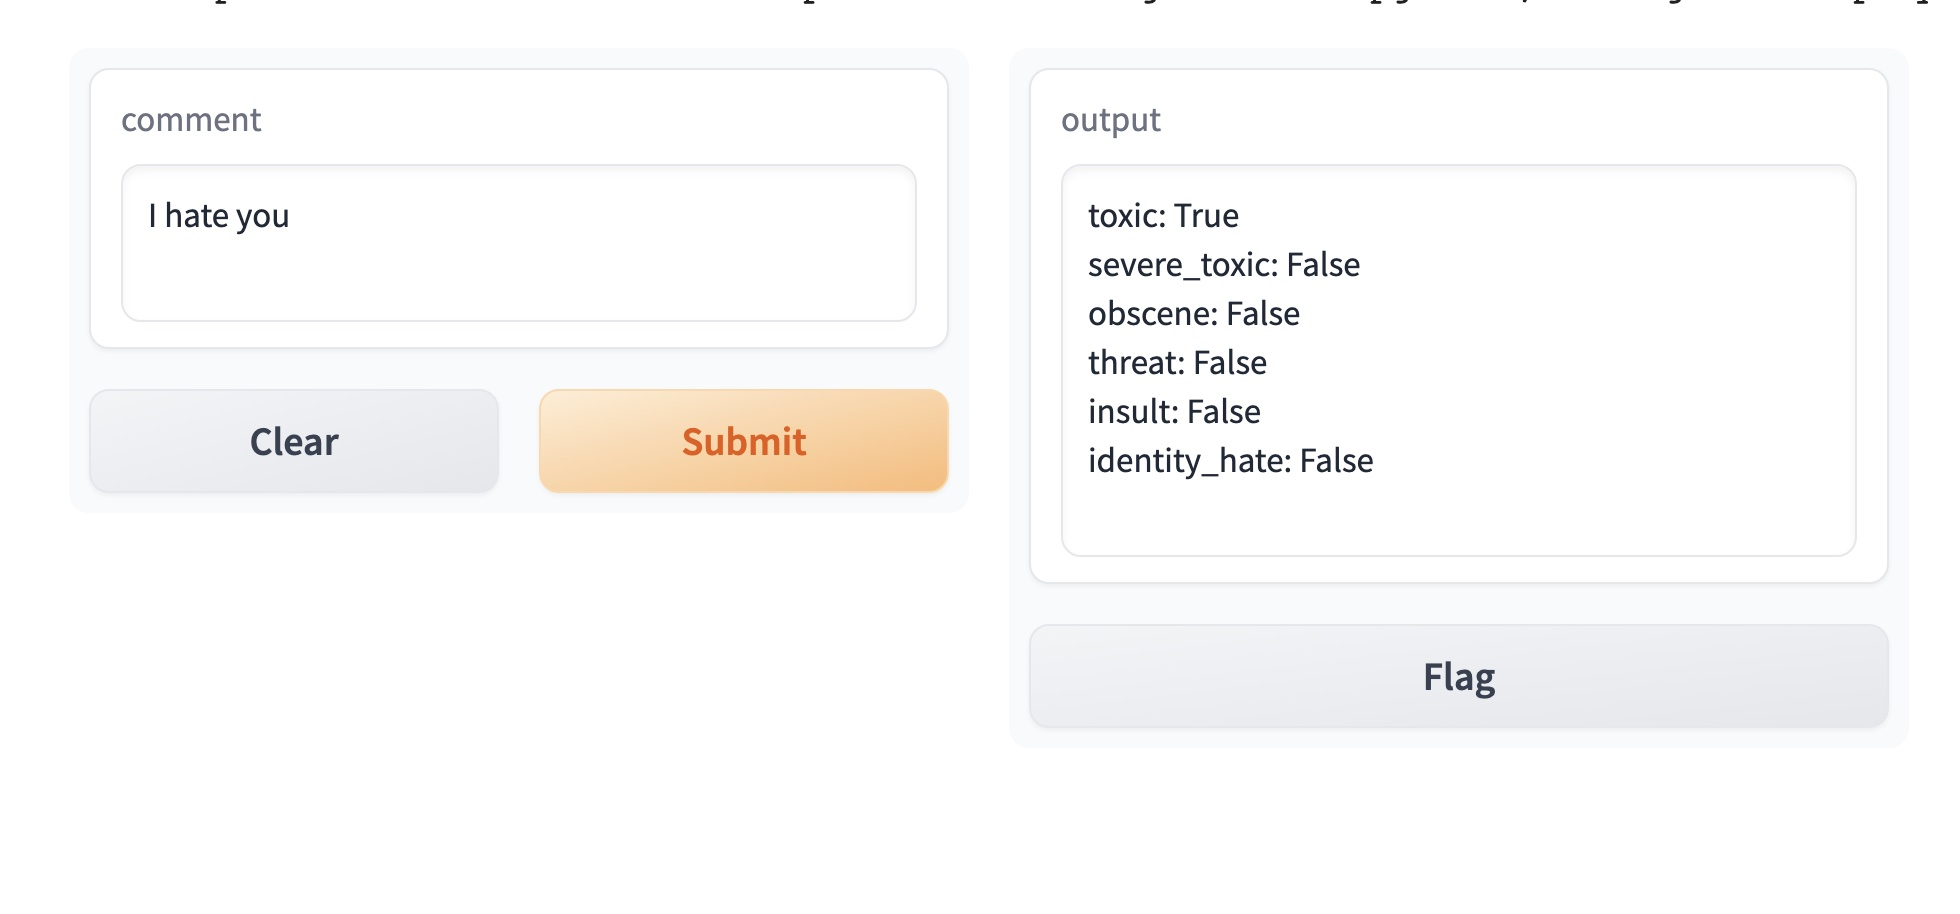

**CONCLUSION:**

Through the above model we have learned that the model can be used for sentiment analysis where in it show the percentage of the toxicity level of the comment and also will determine the tag of the comment.

This model can be a useful tool in business for analysing the comments and working on it. Companies who care about the reviews and work on them can use this model to understand the monthly ratio of comments wheater they are toxic or not.

This can be a great tool in analying the public opinion on websites through analysing the comments.

In [ ]:
!jupyter nbconvert --to html Toxic_Comment_Classifier.ipynb


[NbConvertApp] Converting notebook Toxic_Comment_Classifier.ipynb to html
[NbConvertApp] Writing 1209344 bytes to Toxic_Comment_Classifier.html
